<a href="https://colab.research.google.com/github/Aditi840/Guvi-Tasks/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

**Importing the dataset**

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
print(df)
print(df.columns)
print(df.isnull())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
     User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      F

**Splitting the dataset into the Training set and Test set**

In [4]:
df = pd.get_dummies(df, columns=['Gender'])
print(df)

      User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0    15624510   19            19000          0              0            1
1    15810944   35            20000          0              0            1
2    15668575   26            43000          0              1            0
3    15603246   27            57000          0              1            0
4    15804002   19            76000          0              0            1
..        ...  ...              ...        ...            ...          ...
395  15691863   46            41000          1              1            0
396  15706071   51            23000          1              0            1
397  15654296   50            20000          1              1            0
398  15755018   36            33000          0              0            1
399  15594041   49            36000          1              1            0

[400 rows x 6 columns]


In [5]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting SVM to the Training set**

In [8]:
classifier = SVC(kernel='linear', C=1, random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

**Predicting the Test set results**

In [9]:
y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [10]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[57  1]
 [ 6 16]]


**Visualising the Training set results**

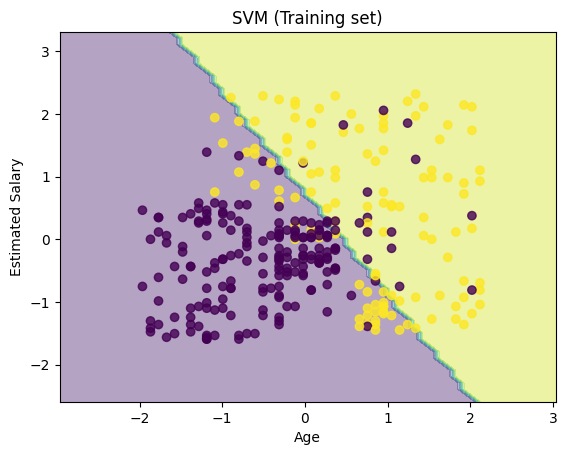

In [12]:
# Create a meshgrid of points that cover the range of the feature space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Generate predictions for each point on the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)

# Set the x and y limits of the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Set the title and labels of the plot
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Show the plot
plt.show()

**Visualising the Test set results**

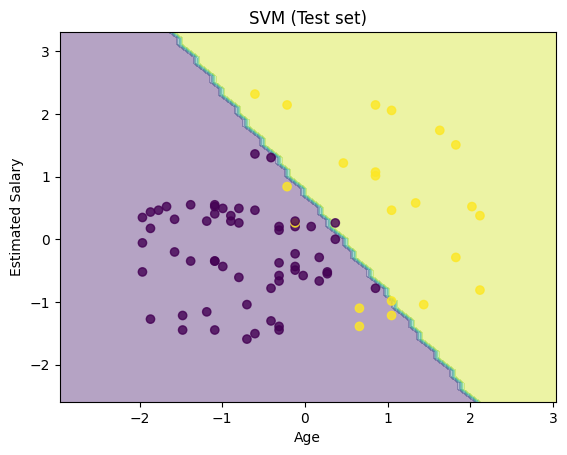

In [13]:
# Create a meshgrid of points that cover the range of the feature space
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Generate predictions for each point on the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the test set
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)

# Set the x and y limits of the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Set the title and labels of the plot
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Show the plot
plt.show()